# Weight Initialization Techniques.


In [2]:
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

* The goal of weight initialization is to prevent layer activation outputs from exploding or vanishing during the training of the DL technique. 


* Training the network without a useful weight initialization can lead to a very slow convergence or an inability to converge


* Weight initialization is an important consideration in the design of a neural network model.


* The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

# Notation


<img src="https://miro.medium.com/max/2400/1*M3Ja24g0cK22gVqG6HFQbw.png"/>


![](https://cdn-images-1.medium.com/max/800/1*xTKaL0jOvwfOso90ZOGa1Q.png)


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/05/291611_dmRbfOye2PcDMl2-bQazVg.jpeg"/>





# Types Of Weight Initialization Techniques:

    * All-zeros initialization and Constant initialization
    
    * Random initialization
    
    * LeCun initialization : normalize variance
    
    * Xavier initialization (Glorot initialization) 
    
    * He initialization (Kaiming initialization) 
       

#  All-zeros initialization and Constant initialization 


* This method sets all weights to zeros (respectively to constant). Also, all activations in all neurons are the     same,and therefore all calculations are the same, making which makes the concerned model a linear model. 


* Initializing all the weights with zeros leads the neurons to learn the same features during training.


* If all the weights are initialized with 0, the derivative with respect to loss function is the same for every w in W[l], thus all weights have the same value in subsequent iterations. 


* This makes hidden units symmetric and continues for all the n iterations i.e. setting weights to 0 does not make it better than a linear model. 


* An important thing to keep in mind is that biases have no effect what so ever when initialized with 0.

<img src="https://miro.medium.com/max/2400/1*aaKYKl892E8v_dw24wDC1w.png"/>


## Observation:


 * zero initialization isn’t successful in classification

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(2,2)))
model.add(tf.keras.layers.Dense(5,use_bias=False,
                                kernel_initializer=tf.keras.initializers.constant()))
# help(tf.keras.initializers.constant())

<AxesSubplot:>

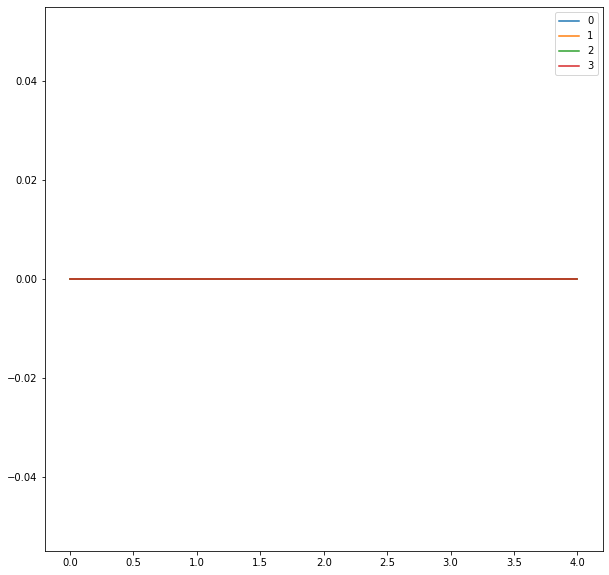

In [6]:
pd.DataFrame(model.get_weights()[0]).T.plot(figsize=(10,10))

# Random initialization

*  This technique tries to address the problems of zero initialization since it prevents neurons from learning the same features of their inputs since our goal is to make each neuron learn different functions of its input and this technique gives much better accuracy than zero initialization.


* In general, it is used to break the symmetry. It is better to assign random values except 0 to weights.


* Remember, neural networks are very sensitive and prone to overfitting as it quickly memorizes the training data.


* Now, after reading this technique a new question comes to mind: “What happens if the weights initialized randomly can be very high or very low?” If using this initialization you have face two issues here, one is vanishing gradient other one is explording gradient


###  Vanishing gradients :

* For any activation function, abs(dW) will get smaller and smaller as we go backward with every layer during backpropagation especially in the case of deep neural networks. So, in this case, the earlier layers’ weights are adjusted slowly.
 
 
* Due to this, the weight update is minor which results in slower convergence.


*  This makes the optimization of our loss function slow. It might be possible in the worst case, this may completely stop the neural network from training further.


* More specifically, in the case of the sigmoid and tanh and activation functions, if your weights are very large, then the gradient will be vanishingly small, effectively preventing the weights from changing their value. This is because abs(dW) will increase very slightly or possibly get smaller and smaller after the completion of every iteration.


* So, here comes the use of the RELU activation function in which vanishing gradients are generally not a problem as the gradient is 0 for negative (and zero) values of inputs and 1 for positive values of inputs.

### Exploding gradients : 
 
This is the exact opposite case of the vanishing gradients, which we discussed above.

* Consider we have weights that are non-negative, large, and having small activations A. When these weights are multiplied along with the different layers, they cause a very large change in the value of the overall gradient (cost). This means that the changes in W, given by the equation W= W — ⍺ * dW, will be in huge steps, the downward moment will increase.

#### Problems occurred due to exploding gradients:

*  This problem might result in the oscillation of the optimizer around the minima or even overshooting the optimum again and again and the model will never learn!



* Due to the large values of the gradients, it may cause numbers to overflow which results in incorrect computations or introductions of NaN’s (missing values).



<img src="https://miro.medium.com/max/2400/1*RzEieVSQ988z1vjJxioyEA.png"/>


## Observation:


* This solution is better than previous one


## Python for RandomNormal Distribution:

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(8,8)))
model.add(tf.keras.layers.Dense(5,use_bias=False,
                                kernel_initializer=tf.keras.initializers.RandomNormal(stddev=1,seed=42)))
# help(tf.keras.initializers.RandomNormal)

In [10]:
pd.DataFrame(model.get_weights()[0]).T

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.015817,-1.579105,0.341467,0.095930,2.387499,-0.523241,-1.234057,-0.737657,-0.961525,0.159621,...,0.333503,-0.074360,-0.071710,0.698332,-1.003812,0.430177,1.815938,0.350069,0.812092,-0.672785
1,-1.590087,0.664126,0.042153,0.972922,-0.993865,-1.504367,0.930916,-0.053004,-0.365429,0.025577,...,1.334232,0.686477,-0.353532,-0.533276,-0.247325,0.335293,0.575887,2.081980,-0.266664,1.584176
2,0.103594,0.347874,1.215531,0.545223,-0.448138,0.118600,-0.324065,1.106563,-0.482199,0.449402,...,-1.039034,1.725396,-1.066633,-0.814664,-0.470097,-0.756330,-0.489773,1.943880,-0.544816,1.879225
3,0.811746,0.657962,0.026314,1.115119,-1.136048,-1.176461,0.021396,0.098395,0.267921,0.036204,...,2.398808,-0.665497,-0.271098,-1.305722,-2.305585,1.382435,-0.640503,2.635123,-0.148203,-0.134020
4,-1.610355,1.915054,-0.796953,0.362769,-0.338396,-1.662173,-1.329358,0.933614,-0.416339,0.727160,...,-0.322378,0.974308,2.335001,1.674897,0.454217,-0.429407,0.377985,-1.003054,-0.572313,0.002551


<AxesSubplot:>

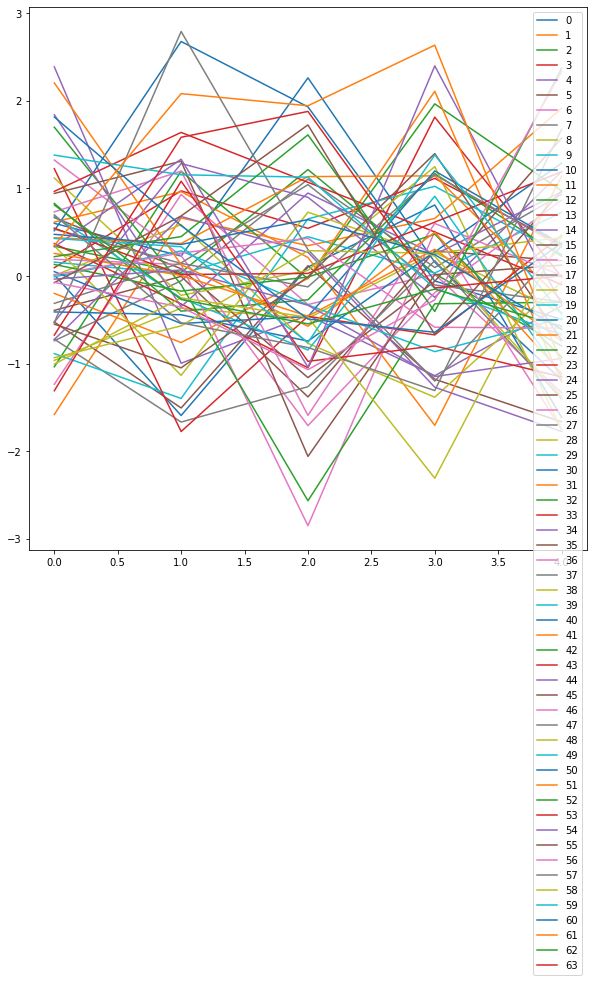

In [11]:
pd.DataFrame(model.get_weights()[0]).T.plot(figsize=(10,10))
# sns.violinplot(x=[0,1,2,3], y=np.arange(0,2), hue=4,data=pd.DataFrame(model.get_weights()[0]).T, kind="violin")

## Python for RandomUniform Distribution:

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(8,8)))
model.add(tf.keras.layers.Dense(5, 
                                use_bias=False,
                                kernel_initializer=tf.keras.initializers.RandomUniform(minval=0,maxval=1,seed=42)))
# help(tf.keras.initializers.RandomUniform)

In [13]:
pd.DataFrame(model.get_weights()[0].T)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.282433,0.626559,0.942529,0.769066,0.035297,0.591367,0.302780,0.669373,0.589174,0.808268,...,0.388408,0.713920,0.937008,0.203749,0.586018,0.129325,0.162897,0.131100,0.693987,0.612185
1,0.498417,0.754998,0.230452,0.536911,0.312780,0.320269,0.852859,0.541374,0.692196,0.903655,...,0.038983,0.178330,0.531851,0.622488,0.711552,0.710186,0.201124,0.017307,0.300496,0.048774
2,0.715459,0.173206,0.477542,0.168705,0.474394,0.762521,0.948628,0.992382,0.858860,0.009048,...,0.032813,0.060266,0.545747,0.592246,0.062765,0.433588,0.722483,0.130457,0.852660,0.111474
3,0.020202,0.128713,0.246555,0.502808,0.559799,0.125753,0.760493,0.643613,0.830715,0.767178,...,0.934945,0.498535,0.710388,0.104864,0.532012,0.350723,0.603900,0.018779,0.707729,0.991056
4,0.078598,0.052670,0.724576,0.199943,0.823537,0.598029,0.314848,0.016712,0.905373,0.007917,...,0.946742,0.904625,0.051306,0.894613,0.822273,0.297932,0.875718,0.307887,0.676995,0.753029


<AxesSubplot:>

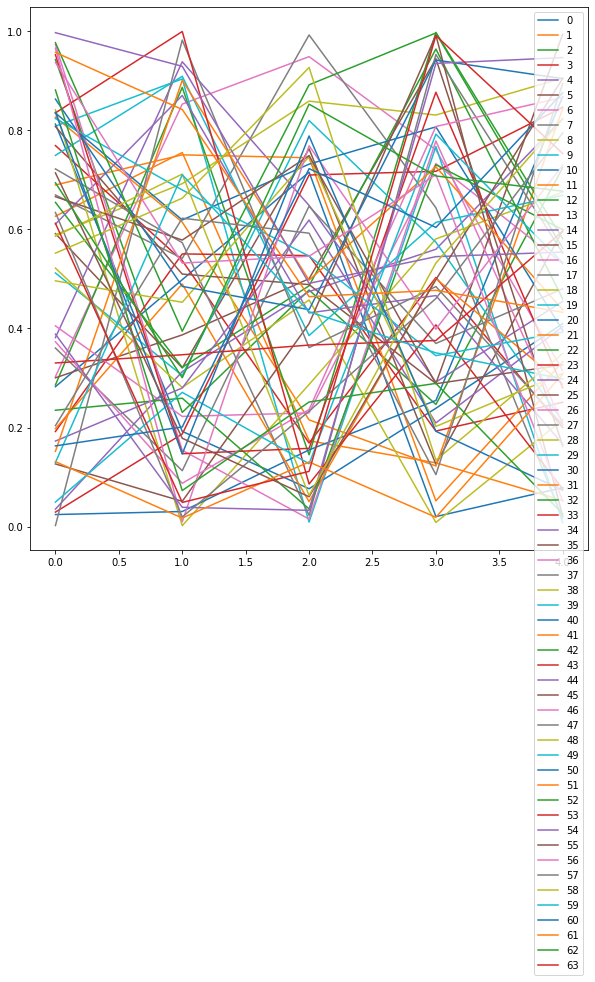

In [14]:
pd.DataFrame(model.get_weights()[0].T).plot(figsize=(10,10))

# LeCun initialization : normalize variance


* LeCun initialization aims to prevent the vanishing or explosion of the gradients during the backpropagation by solving the growing variance with the number of inputs and by setting constant variance.

## Python for LecunNormal Distribution:

In [59]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(8,8)))
model.add(tf.keras.layers.Dense(5,
                                use_bias=False,
                                kernel_initializer=tf.keras.initializers.LecunNormal(seed=42)))
# help(tf.keras.initializers.LecunNormal)

In [60]:
pd.DataFrame(model.get_weights()[0])

,0,1,2,3,4
0,0.002248,-0.225961,0.014721,0.115354,-0.003042
1,0.016779,-0.000796,-0.020577,-0.006708,0.146327
2,-0.056977,0.017045,0.113509,-0.194110,-0.077439
3,-0.018522,0.046072,0.034287,0.196795,0.132988
4,0.137386,-0.183996,-0.074898,0.139106,0.125864
...,...,...,...,...,...
59,-0.020487,-0.248961,0.185184,0.203377,-0.170295
60,-0.006019,0.051706,0.051788,0.282854,0.163374
61,0.060818,0.213172,-0.237579,-0.212523,-0.012413
62,-0.016409,0.038959,0.170072,0.164466,-0.269840


<AxesSubplot:>

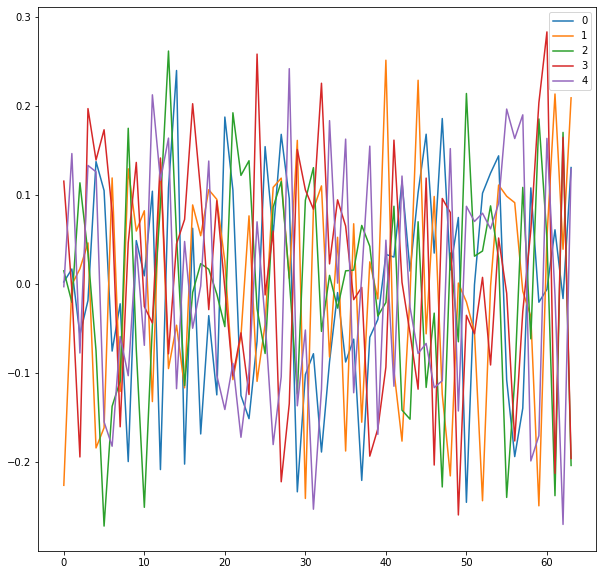

In [61]:
pd.DataFrame(model.get_weights()[0]).plot(figsize=(10,10))

## Python for LecunUniform Distribution:

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(8,8)))
model.add(tf.keras.layers.Dense(5,
                                use_bias=False,
                                kernel_initializer=tf.keras.initializers.LecunUniform(seed=42)))
# help(tf.keras.initializers.LecunUniform)

In [16]:
pd.DataFrame(model.get_weights()[0]).T

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.094209,0.054802,0.191621,0.116509,-0.201222,0.039563,-0.085399,0.073341,0.038613,0.133484,...,-0.048321,0.092630,0.189230,-0.128281,0.037247,-0.160507,-0.145970,-0.159739,0.083999,0.048578
1,-0.000685,0.110418,-0.116718,0.015983,-0.081068,-0.077826,0.152792,0.017915,0.083223,0.174788,...,-0.199626,-0.139287,0.013792,0.053039,0.091605,0.091013,-0.129417,-0.209012,-0.086388,-0.195386
2,0.093296,-0.141506,-0.009725,-0.143455,-0.011088,0.113675,0.194262,0.213208,0.155391,-0.212588,...,-0.202298,-0.190410,0.019809,0.039944,-0.189328,-0.028757,0.096338,-0.160017,0.152706,-0.168237
3,-0.207759,-0.160772,-0.109745,0.001216,0.025894,-0.162054,0.112797,0.062186,0.143204,0.115692,...,0.188337,-0.000634,0.091100,-0.171099,0.013862,-0.064639,0.044990,-0.208375,0.089949,0.212634
4,-0.182472,-0.193699,0.097244,-0.129929,0.140096,0.042448,-0.080173,-0.209270,0.175532,-0.213078,...,0.193445,0.175208,-0.194290,0.170872,0.139548,-0.087498,0.162691,-0.083187,0.076641,0.109565


<AxesSubplot:>

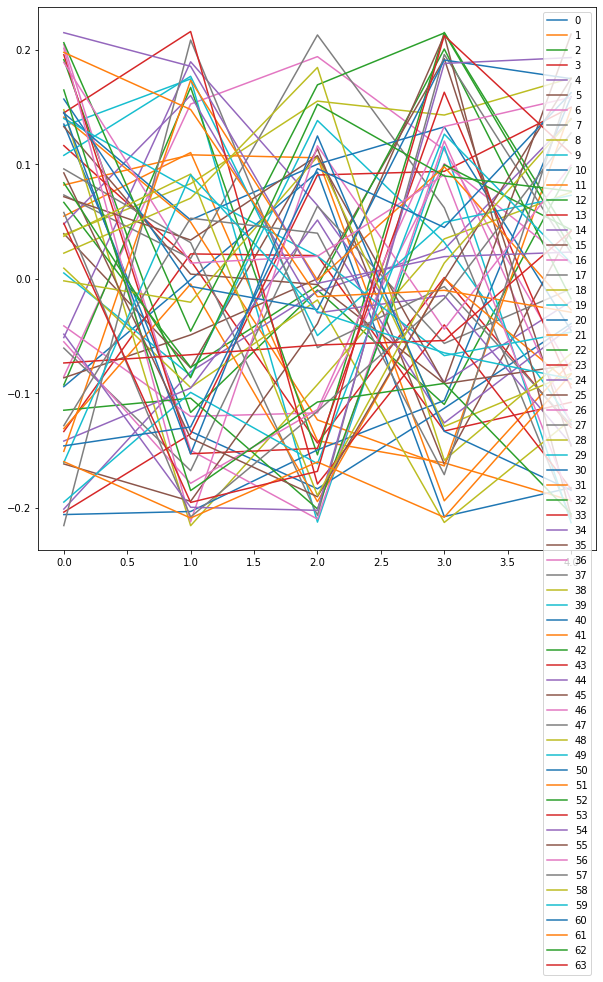

In [17]:
pd.DataFrame(model.get_weights()[0].T).plot(figsize=(10,10))

# Xavier initialization (Glorot initialization)

* The current standard approach for initialization of the weights of neural network layers and nodes that use the Sigmoid or TanH activation function is called “glorot” or “xavier” initialization.


* The goal of Xavier Initialization is to initialize the weights such that the variance of the activations are the same across every layer. This constant variance helps prevent the gradient from exploding or vanishing.

    #### Glorot and Bengio proposed to adopt a properly scaled uniform distribution for initialization. This is called “Xavier” initialization […] Its derivation is based on the assumption that the activations are linear. This assumption is invalid for ReLU and PReLU.###

Unifom Distribution based formula:
$$w_{ij}\sim U\begin{bmatrix}
\frac{-1}{\sqrt{fan-in}},\frac{1}{\sqrt{fan-in}}& 
\end{bmatrix}$$
 

Xavier Normal initialization formula

$$_{wij}\sim N(0,\varrho )$$



$$ \varrho= \sqrt{\frac{2}{fan-in+fan-out}}$$
     

## HeNormal Distribution:

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(8,8)))
model.add(tf.keras.layers.Dense(5,activation="relu", 
                                use_bias=False,
                                kernel_initializer=tf.keras.initializers.HeNormal(seed=42)))
# help(tf.keras.initializers.HeNormal)

In [19]:
pd.DataFrame(model.get_weights()[0]).T

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.003179,0.023730,-0.080577,-0.026194,0.194292,0.148225,-0.106500,-0.031448,-0.281863,0.068861,...,0.203354,-0.152316,-0.273949,-0.197198,0.152459,-0.028973,-0.008513,0.086010,-0.023205,0.184733
1,-0.319557,-0.001125,0.024106,0.065156,-0.260210,-0.228156,0.168252,-0.170503,0.182761,0.084011,...,0.156987,0.139230,0.129019,-0.011438,-0.051653,-0.352084,0.073123,0.301471,0.055096,0.295418
2,0.020819,-0.029100,0.160526,0.048489,-0.105921,-0.384257,-0.194162,-0.153888,0.247074,-0.103815,...,0.039980,-0.338732,-0.152150,0.153247,-0.087082,0.261890,0.073239,-0.335988,0.240519,-0.288030
3,0.163135,-0.009487,-0.274512,0.278310,0.196725,0.244733,0.113952,-0.226640,0.065220,0.192884,...,0.072937,-0.014793,-0.249171,-0.043976,0.085266,0.287619,0.400016,-0.300554,0.232590,-0.276859
4,-0.004302,0.206938,-0.109515,0.188073,0.177999,-0.218846,-0.257510,-0.083492,-0.145572,0.061020,...,0.127700,0.277554,0.230832,0.268417,-0.280859,-0.240833,0.231046,-0.017554,-0.381611,0.182677


<AxesSubplot:>

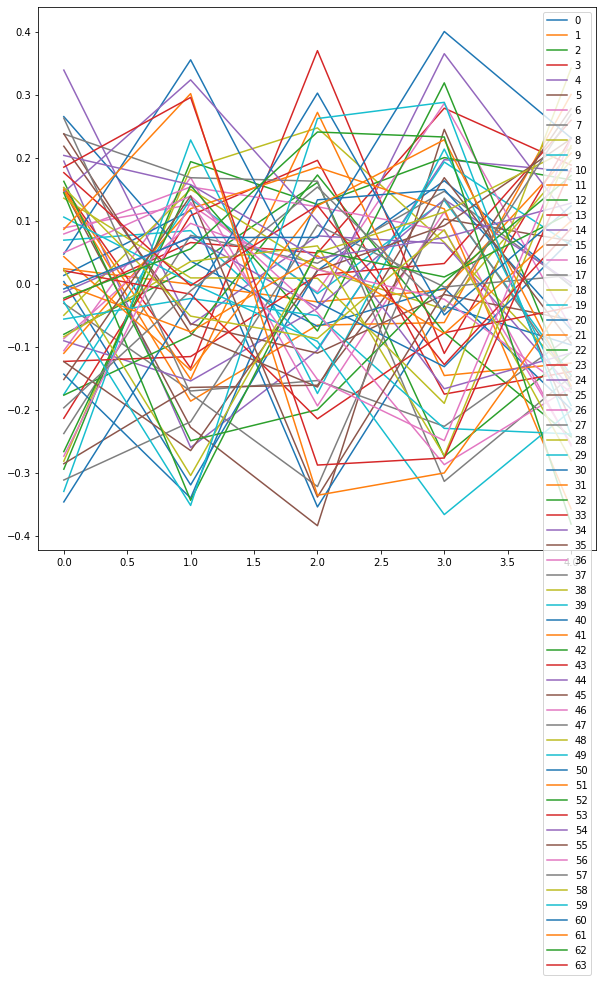

In [20]:
pd.DataFrame(model.get_weights()[0].T).plot(figsize=(10,10))

We can see that with very few inputs, the range is large, such as between -1 and 1 or -0.7 to -7. We can then see that our range rapidly drops to about 20 weights to near -0.1 and 0.1, where it remains reasonably constant.

Xavier Uniform initialization formula
            $$w_{ij}\sim U\begin{bmatrix}
\frac{-\sqrt{6}}{\sqrt{fan-in+fan-out}},\frac{\sqrt{6}}{\sqrt{fan-in+fan-out}} & 
\end{bmatrix}$$

The normalized xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range -(sqrt(6)/sqrt(n + m)) and sqrt(6)/sqrt(n + m), where n us the number of inputs to the node (e.g. number of nodes in the previous layer) and m is the number of outputs from the layer (e.g. number of nodes in the current layer).

## HeUniform Distribution:

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(8,8)))
model.add(tf.keras.layers.Dense(5,activation="relu", 
                                use_bias=False,
                                kernel_initializer=tf.keras.initializers.HeUniform(seed=42)))
# help(tf.keras.initializers.HeUniform)

In [22]:
pd.DataFrame(model.get_weights()[0]).T

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.133232,0.077501,0.270993,0.164769,-0.284571,0.055950,-0.120772,0.103719,0.054608,0.188775,...,-0.068336,0.130999,0.267612,-0.181416,0.052675,-0.226991,-0.206433,-0.225904,0.118792,0.068699
1,-0.000969,0.156154,-0.165064,0.022603,-0.114648,-0.110062,0.216081,0.025336,0.117696,0.247187,...,-0.282314,-0.196982,0.019504,0.075009,0.129549,0.128712,-0.183023,-0.295588,-0.122171,-0.276318
2,0.131941,-0.200120,-0.013753,-0.202876,-0.015680,0.160761,0.274728,0.301521,0.219756,-0.300645,...,-0.286093,-0.269281,0.028014,0.056489,-0.267751,-0.040669,0.136242,-0.226298,0.215959,-0.237923
3,-0.293815,-0.227366,-0.155203,0.001720,0.036620,-0.229179,0.159518,0.087945,0.202521,0.163613,...,0.266349,-0.000897,0.128836,-0.241971,0.019603,-0.091413,0.063626,-0.294686,0.127207,0.300709
4,-0.258055,-0.273932,0.137524,-0.183747,0.198125,0.060030,-0.113382,-0.295952,0.248239,-0.301338,...,0.273573,0.247781,-0.274768,0.241650,0.197351,-0.123741,0.230080,-0.117645,0.108387,0.154948


<AxesSubplot:>

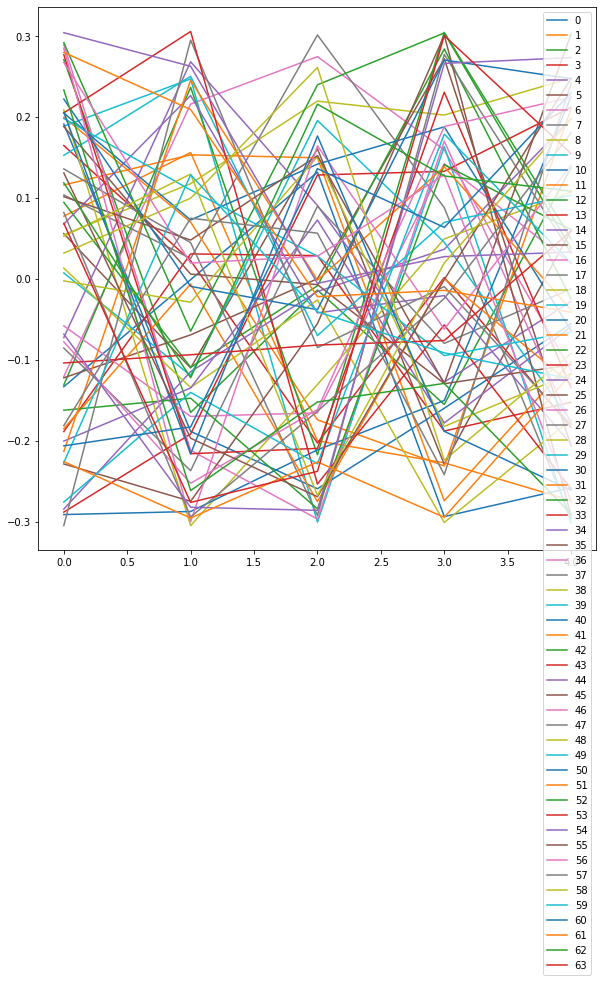

In [23]:
pd.DataFrame(model.get_weights()[0].T).plot(figsize=(10,10))

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQnR_m1rGOrSX-8uus3ZpPPNWY4MLLS6QMBDZ_FtrqV3fR4tsK8RIhXyKa0LW--JEuU8R0&usqp=CAU"/>   

# He initialization (Kaiming initialization) 

* The “xavier” weight initialization was found to have problems when used to initialize networks that use the rectified linear (ReLU) activation function.


* The current standard approach for initialization of the weights of neural network layers and nodes that use the rectified linear (ReLU) activation function is called “he” initialization.


* The he initialization method is calculated as a random number with a Gaussian probability distribution (G) with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the node.


He normal intialization formula

$$_{wij}\sim N(0,\varrho )$$


$$ \varrho= \sqrt{\frac{2}{fan-in}}$$


0.4472135954999579
-1.5671557372800977 1.4675233112039663
0.03778860360123113 0.4545513449807578


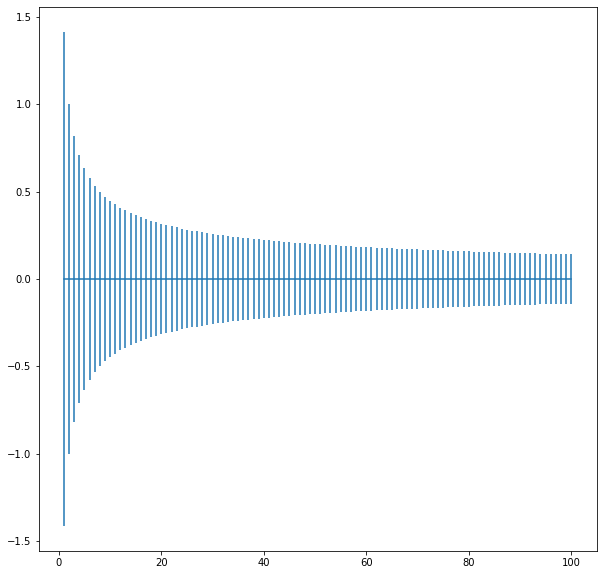

In [20]:
# The example below assumes 10 inputs to a node, 
# then calculates the standard deviation of the Gaussian distribution and 
# calculates 1,000 initial weight values that could be used for 
# the nodes in a layer or a network that uses the ReLU activation function.


# example of the he normal weight initialization
from math import sqrt
from numpy.random import randn
# number of nodes in the previous layer
n = 10
# calculate the range for the weights
std = sqrt(2.0 / n)
# generate random numbers
numbers = randn(1000)
# scale to the desired range
scaled = numbers * std
# summarize
print(std)
print(scaled.min(), scaled.max())
print(scaled.mean(), scaled.std())

# plot of the bounds on he weight initialization for different numbers of inputs
from math import sqrt
from matplotlib import pyplot
# define the number of inputs from 1 to 100
values = [i for i in range(1, 101)]
# calculate the range for each number of inputs
results = [sqrt(2.0 / n) for n in values]
# create an error bar plot centered on 0 for each number of inputs
plt.subplots(figsize=(10,10))
pyplot.errorbar(values, [0.0 for _ in values], yerr=results)
pyplot.show()

# We can see that the bound of the calculated standard deviation of the weights is about 0.447. 
# This standard deviation would become larger with fewer inputs and smaller with more inputs.

# We can see that the range of the weights is about -1.573 to 1.433 which is close to the theoretical range of about 
# -1.788 and 1.788, which is four times the standard deviation, capturing 99.7% of observations 
# in the Gaussian distribution. We can also see that the mean and standard deviation of the 
# generated weights are close to the prescribed 0.0 and 0.447 respectively.

We can see that with very few inputs, the range is large, near -1.5 and 1.5 or -1.0 to -1.0. We can then see that our range rapidly drops to about 20 weights to near -0.1 and 0.1, where it remains reasonably constant.

He Uniform initialzation formula

$$w_{ij}\sim U\begin{bmatrix}
\frac{-\sqrt{6}}{\sqrt{fan-in}},\frac{\sqrt{6}}{\sqrt{fan-in}} & 
\end{bmatrix}$$


-0.7745966692414833 0.7745966692414833
-0.7739446001254483 0.7729105807391855
-0.015588638349217093 0.4426008537844725


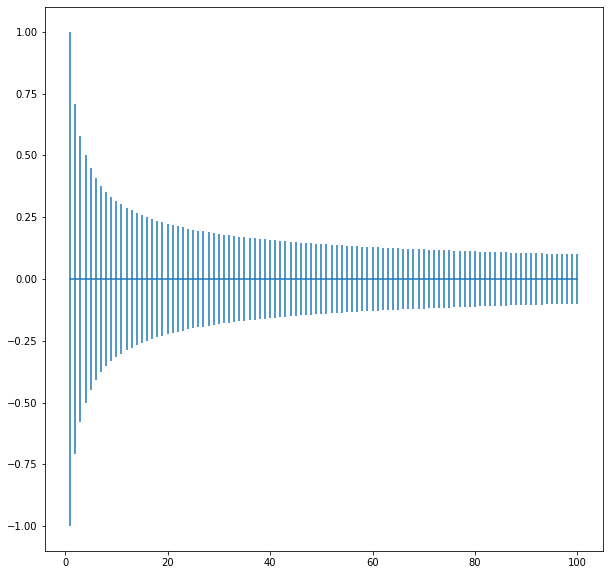

In [21]:
# example of the He Uniform weight initialization
from math import sqrt
from numpy import mean
from numpy.random import rand # standard Uniform distribution
# number of nodes in the previous layer
fan_in = 10
# calculate the range for the weights
lower, upper = -(sqrt(6.0) / sqrt(fan_in)), (sqrt(6.0) / sqrt(fan_in))
# generate random numbers
numbers = rand(1000)
# scale to the desired range
scaled = lower + numbers * (upper - lower)
# summarize
print(lower, upper)
print(scaled.min(), scaled.max())
print(scaled.mean(), scaled.std())


# plot of the bounds of normalized xavier weight initialization for different numbers of inputs
from math import sqrt
from matplotlib import pyplot
# define the number of inputs from 1 to 100
# values = [i for i in range(1, 101)]
# define the number of outputs
# calculate the range for each number of inputs
results = [1.0 / sqrt(n) for n in range(1, 101)]
# create an error bar plot centered on 0 for each number of inputs
plt.subplots(figsize=(10,10))
pyplot.errorbar(values, [0.0 for _ in values], yerr=results)
pyplot.show()

In [3]:
dir(tf.keras.initializers)

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [4]:
(x_train_full,y_train_full),(x_test_full,y_test_full) = tf.keras.datasets.mnist.load_data()
x_train_val,x_train = x_train_full[0:4000]/255,x_train_full[4000:]/255
y_train_val,y_train = y_train_full[0:4000],y_train_full[4000:]
x_test_full = x_test_full/255

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation="sigmoid", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="sigmoid", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="sigmoid", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42)))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"),loss="SparseCategoricalCrossentropy",metrics='accuracy')
history_sgd_gort_sigmoid = model.fit(x_train,y_train,epochs=20,validation_data=(x_train_val,y_train_val))

Epoch 1/20
1750/1750 [==============================] - 14s 8ms/step - loss: 1.6407 - accuracy: 0.4294 - val_loss: 0.7190 - val_accuracy: 0.7983
Epoch 2/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.5378 - accuracy: 0.8445 - val_loss: 0.4003 - val_accuracy: 0.8873
Epoch 3/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.3612 - accuracy: 0.8964 - val_loss: 0.3125 - val_accuracy: 0.9143
Epoch 4/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.2804 - accuracy: 0.9200 - val_loss: 0.2444 - val_accuracy: 0.9340
Epoch 5/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.2278 - accuracy: 0.9348 - val_loss: 0.1984 - val_accuracy: 0.9445
Epoch 6/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1909 - accuracy: 0.9452 - val_loss: 0.1743 - val_accuracy: 0.9515
Epoch 7/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.1643 - accuracy: 0.9523 - val_loss: 0.1533 - val_ac

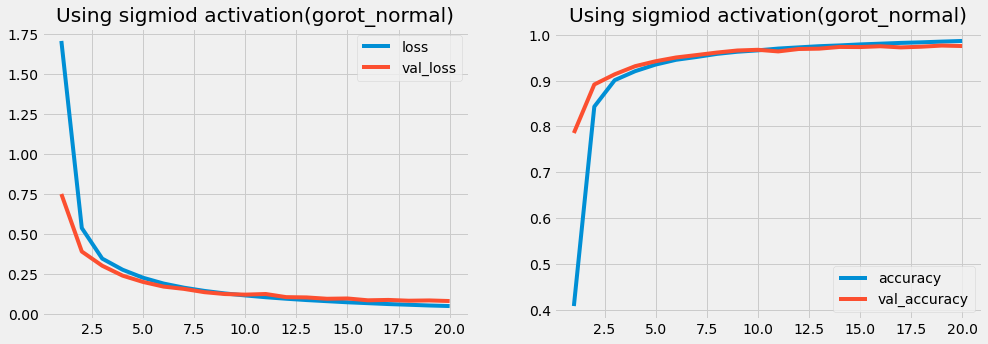

In [71]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Using sigmiod activation(gorot_normal)")
plt.plot(np.arange(1,21),history_sgd_gort_sigmoid.history["loss"], label="loss")
plt.plot(np.arange(1,21),history_sgd_gort_sigmoid.history["val_loss"],label="val_loss")
plt.legend()
plt.subplot(1,2,2)
plt.title("Using sigmiod activation(gorot_normal)")
plt.plot(np.arange(1,21),history_sgd_gort_sigmoid.history["accuracy"], label="accuracy")
plt.plot(np.arange(1,21),history_sgd_gort_sigmoid.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [43]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation="sigmoid", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="sigmoid", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="sigmoid", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [44]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"),loss="SparseCategoricalCrossentropy",metrics='accuracy')
history_sgd_gort_unifrom_sigmoid = model.fit(x_train,y_train,epochs=20,validation_data=(x_train_val,y_train_val))

Epoch 1/20
1750/1750 [==============================] - 17s 7ms/step - loss: 1.7339 - accuracy: 0.3913 - val_loss: 0.7215 - val_accuracy: 0.7905
Epoch 2/20
1750/1750 [==============================] - 11s 6ms/step - loss: 0.5105 - accuracy: 0.8543 - val_loss: 0.3830 - val_accuracy: 0.8898
Epoch 3/20
1750/1750 [==============================] - 11s 7ms/step - loss: 0.3524 - accuracy: 0.8987 - val_loss: 0.2993 - val_accuracy: 0.9155
Epoch 4/20
1750/1750 [==============================] - 11s 7ms/step - loss: 0.2810 - accuracy: 0.9183 - val_loss: 0.2408 - val_accuracy: 0.9330
Epoch 5/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.2293 - accuracy: 0.9333 - val_loss: 0.1991 - val_accuracy: 0.9427
Epoch 6/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1926 - accuracy: 0.9432 - val_loss: 0.1703 - val_accuracy: 0.9510
Epoch 7/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1654 - accuracy: 0.9514 - val_loss: 0.1503 - val_ac

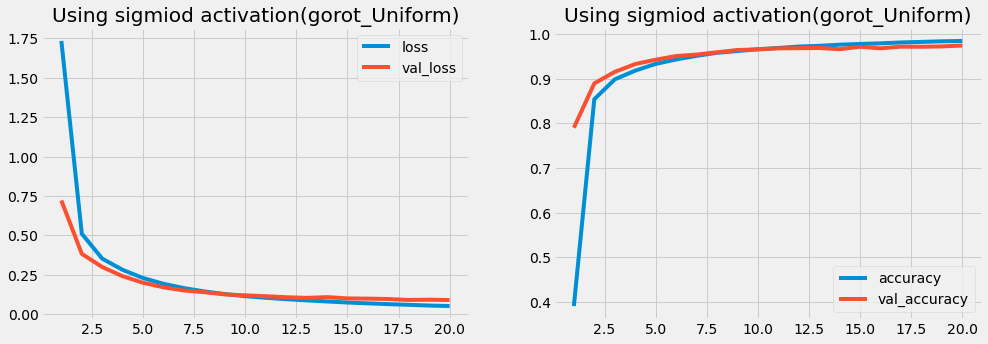

In [72]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Using sigmiod activation(gorot_Uniform)")
plt.plot(np.arange(1,21),history_sgd_gort_unifrom_sigmoid.history["loss"], label="loss")
plt.plot(np.arange(1,21),history_sgd_gort_unifrom_sigmoid.history["val_loss"],label="val_loss")
plt.legend()
plt.subplot(1,2,2)
plt.title("Using sigmiod activation(gorot_Uniform)")
plt.plot(np.arange(1,21),history_sgd_gort_unifrom_sigmoid.history["accuracy"], label="accuracy")
plt.plot(np.arange(1,21),history_sgd_gort_unifrom_sigmoid.history["val_accuracy"],label="val_accuracy")
plt.legend()

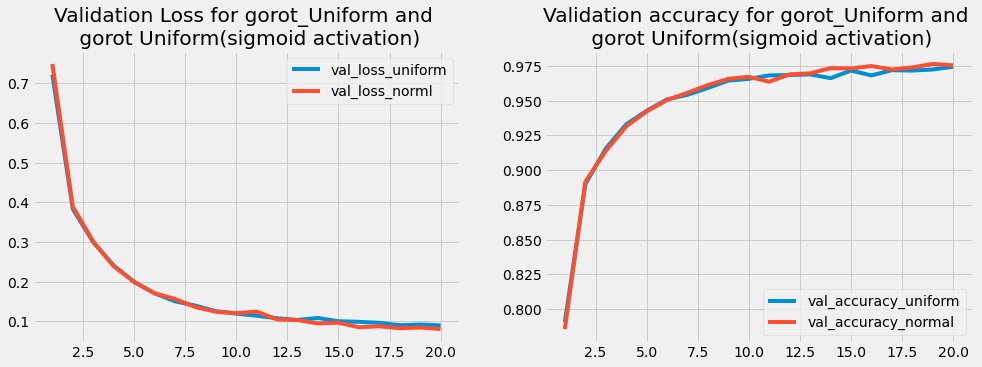

In [86]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Validation Loss for gorot_Uniform and \n gorot Uniform(sigmoid activation)")
plt.plot(np.arange(1,21),history_sgd_gort_unifrom_sigmoid.history["val_loss"], label="val_loss_uniform")
plt.plot(np.arange(1,21),history_sgd_gort_sigmoid.history["val_loss"], label="val_loss_norml")
plt.legend()
plt.subplot(1,2,2)
plt.title("Validation accuracy for gorot_Uniform and \n gorot Uniform(sigmoid activation)")
plt.plot(np.arange(1,21),history_sgd_gort_unifrom_sigmoid.history["val_accuracy"], label="val_accuracy_uniform")
plt.plot(np.arange(1,21),history_sgd_gort_sigmoid.history["val_accuracy"], label="val_accuracy_normal")
plt.legend()

## Observation:

    In using Gorot uniform distribution with Sigmoid activation is sligthly better than Gorot normal 
    distribution

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation="tanh", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="tanh", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="tanh", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotNormal(seed=42)))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"),loss="SparseCategoricalCrossentropy",metrics='accuracy')
history_sgd_gort_normal_tanh = model.fit(x_train,y_train,epochs=20,validation_data=(x_train_val,y_train_val))

Epoch 1/20
1750/1750 [==============================] - 16s 8ms/step - loss: 0.2965 - accuracy: 0.9141 - val_loss: 0.1702 - val_accuracy: 0.9507
Epoch 2/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.1389 - accuracy: 0.9581 - val_loss: 0.1270 - val_accuracy: 0.9603
Epoch 3/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0984 - accuracy: 0.9699 - val_loss: 0.0979 - val_accuracy: 0.9737
Epoch 4/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.0888 - val_accuracy: 0.9718
Epoch 5/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0605 - accuracy: 0.9803 - val_loss: 0.0839 - val_accuracy: 0.9743
Epoch 6/20
1750/1750 [==============================] - 13s 8ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0757 - val_accuracy: 0.9780
Epoch 7/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0829 - val_ac

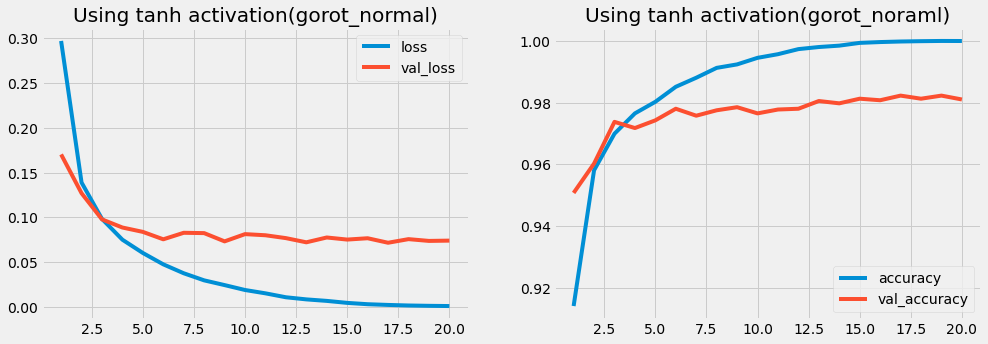

In [7]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Using tanh activation(gorot_normal)")
plt.plot(np.arange(1,21),history_sgd_gort_normal_tanh.history["loss"], label="loss")
plt.plot(np.arange(1,21),history_sgd_gort_normal_tanh.history["val_loss"],label="val_loss")
plt.legend()
plt.subplot(1,2,2)
plt.title("Using tanh activation(gorot_noraml)")
plt.plot(np.arange(1,21),history_sgd_gort_normal_tanh.history["accuracy"], label="accuracy")
plt.plot(np.arange(1,21),history_sgd_gort_normal_tanh.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation="tanh", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="tanh", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="tanh", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [22]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"),loss="SparseCategoricalCrossentropy",metrics='accuracy')
history_sgd_gort_uniform_tanh = model.fit(x_train,y_train,epochs=20,validation_data=(x_train_val,y_train_val))

Epoch 1/20
1750/1750 [==============================] - 17s 7ms/step - loss: 0.2894 - accuracy: 0.9156 - val_loss: 0.1626 - val_accuracy: 0.9517
Epoch 2/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1365 - accuracy: 0.9584 - val_loss: 0.1071 - val_accuracy: 0.9672
Epoch 3/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0968 - accuracy: 0.9699 - val_loss: 0.0885 - val_accuracy: 0.9737
Epoch 4/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0741 - accuracy: 0.9770 - val_loss: 0.0802 - val_accuracy: 0.9745
Epoch 5/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0767 - val_accuracy: 0.9762
Epoch 6/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0722 - val_accuracy: 0.9795
Epoch 7/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0385 - accuracy: 0.9874 - val_loss: 0.0745 - val_ac

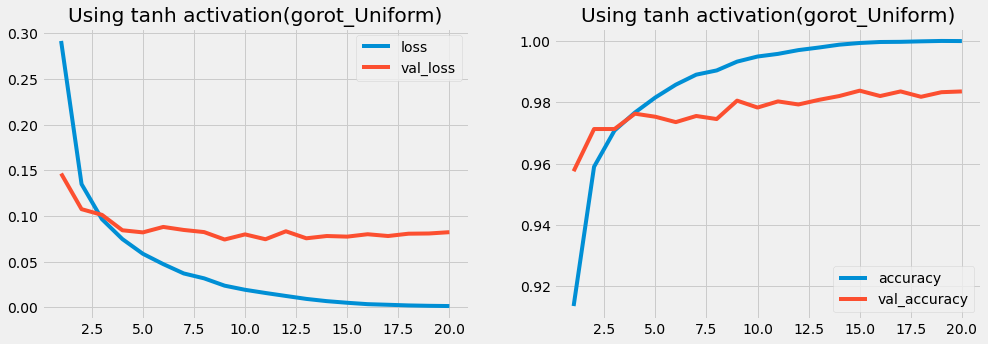

In [78]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Using tanh activation(gorot_Uniform)")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_tanh.history["loss"], label="loss")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_tanh.history["val_loss"],label="val_loss")
plt.legend()
plt.subplot(1,2,2)
plt.title("Using tanh activation(gorot_Uniform)")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_tanh.history["accuracy"], label="accuracy")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_tanh.history["val_accuracy"],label="val_accuracy")
plt.legend()

## Observation:
        tanh activation with Glorot initialization is better converging than sigmoid activation with Glorot initialization

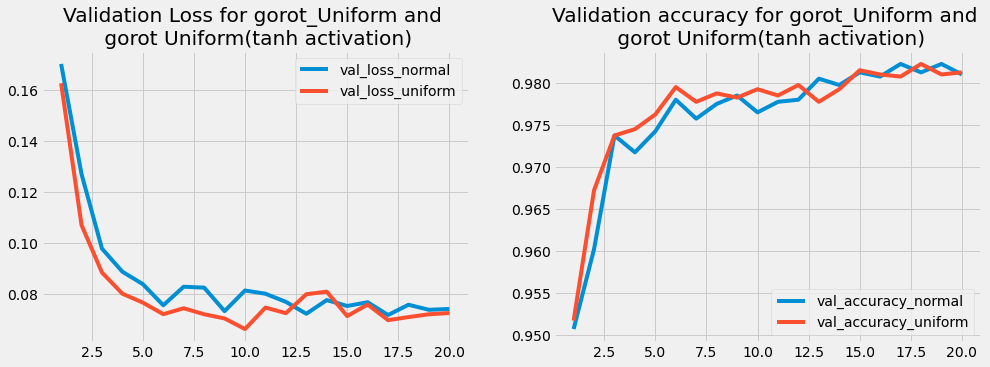

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Validation Loss for gorot_Uniform and \n gorot Uniform(tanh activation)")
plt.plot(np.arange(1,21),history_sgd_gort_normal_tanh.history["val_loss"], label="val_loss_normal")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_tanh.history["val_loss"],label="val_loss_uniform")
plt.legend()
plt.subplot(1,2,2)
plt.title("Validation accuracy for gorot_Uniform and \n gorot Uniform(tanh activation)")
plt.plot(np.arange(1,21),history_sgd_gort_normal_tanh.history["val_accuracy"], label="val_accuracy_normal")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_tanh.history["val_accuracy"],label="val_accuracy_uniform")
plt.legend()

## Observation:
        I use tanh activation with glorot Uniform is better perform than tanh activation with glorot Normal

In [87]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation="relu", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="relu", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="relu", use_bias=False,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [88]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"),loss="SparseCategoricalCrossentropy",metrics='accuracy')
history_sgd_gort_uniform_relu = model.fit(x_train,y_train,epochs=20,validation_data=(x_train_val,y_train_val))

Epoch 1/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.3002 - accuracy: 0.9092 - val_loss: 0.1310 - val_accuracy: 0.9643
Epoch 2/20
1750/1750 [==============================] - 11s 7ms/step - loss: 0.1231 - accuracy: 0.9630 - val_loss: 0.1257 - val_accuracy: 0.9600
Epoch 3/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0881 - accuracy: 0.9730 - val_loss: 0.1239 - val_accuracy: 0.9653
Epoch 4/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0678 - accuracy: 0.9782 - val_loss: 0.0958 - val_accuracy: 0.9758
Epoch 5/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0545 - accuracy: 0.9824 - val_loss: 0.0978 - val_accuracy: 0.9700
Epoch 6/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0892 - val_accuracy: 0.9758
Epoch 7/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0995 - val_ac

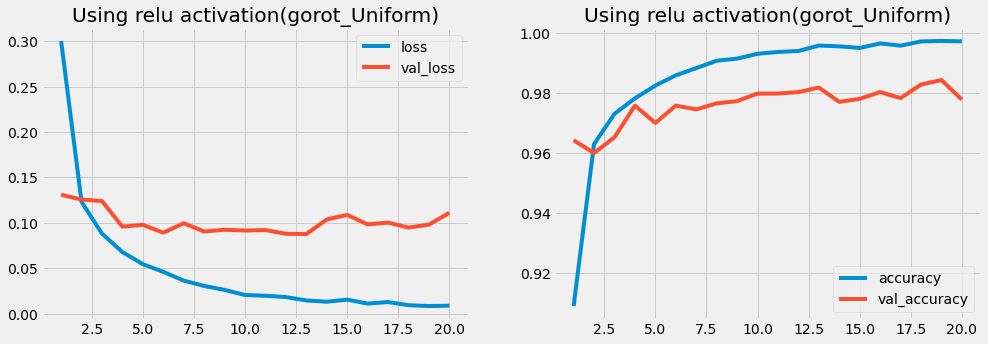

In [89]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Using relu activation(gorot_Uniform)")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_relu.history["loss"], label="loss")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_relu.history["val_loss"],label="val_loss")
plt.legend()
plt.subplot(1,2,2)
plt.title("Using relu activation(gorot_Uniform)")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_relu.history["accuracy"], label="accuracy")
plt.plot(np.arange(1,21),history_sgd_gort_uniform_relu.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation="relu", use_bias=False,
                                kernel_initializer=tf.keras.initializers.HeUniform(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="relu", use_bias=False,
                                kernel_initializer=tf.keras.initializers.HeUniform(seed=42)))
model.add(tf.keras.layers.Dense(100,activation="relu", use_bias=False,
                                kernel_initializer=tf.keras.initializers.HeUniform(seed=42)))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name="SGD"),loss="SparseCategoricalCrossentropy",metrics='accuracy')
history_sgd_he_uniform_relu = model.fit(x_train,y_train,epochs=20,validation_data=(x_train_val,y_train_val))

Epoch 1/20
1750/1750 [==============================] - 14s 7ms/step - loss: 0.2687 - accuracy: 0.9187 - val_loss: 0.1370 - val_accuracy: 0.9585
Epoch 2/20
1750/1750 [==============================] - 13s 8ms/step - loss: 0.1194 - accuracy: 0.9631 - val_loss: 0.1028 - val_accuracy: 0.9705
Epoch 3/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.0836 - accuracy: 0.9744 - val_loss: 0.0852 - val_accuracy: 0.9743
Epoch 4/20
1750/1750 [==============================] - 13s 8ms/step - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.0983 - val_accuracy: 0.9710
Epoch 5/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.1193 - val_accuracy: 0.9653
Epoch 6/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.0955 - val_accuracy: 0.9750
Epoch 7/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.1048 - val_ac

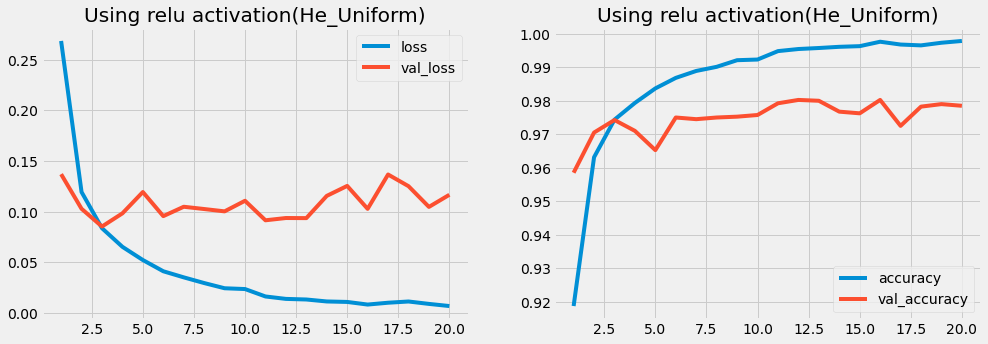

In [11]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Using relu activation(He_Uniform)")
plt.plot(np.arange(1,21),history_sgd_he_uniform_relu.history["loss"], label="loss")
plt.plot(np.arange(1,21),history_sgd_he_uniform_relu.history["val_loss"],label="val_loss")
plt.legend()
plt.subplot(1,2,2)
plt.title("Using relu activation(He_Uniform)")
plt.plot(np.arange(1,21),history_sgd_he_uniform_relu.history["accuracy"], label="accuracy")
plt.plot(np.arange(1,21),history_sgd_he_uniform_relu.history["val_accuracy"],label="val_accuracy")
plt.legend()

## Summary of weight initialization solutions to activations:

* Tanh/Sigmoid vanishing gradients can be solved with Xavier initialization
        * Good range of constant variance
* ReLU/Leaky ReLU exploding gradients can be solved with He initialization
        * Good range of constant variance

# Comparsion of  main weight initialization techniques according to their advantages and Disadvantages: 

|Initialization method ||Advantages||Disadvantages|
|---||---||---|
|All-zeros constant ||Simplicity||Symmetry problem leading neurons to learn the same feature|
|Random ||Improves the symmetry-breaking process || A saturation may occur leading to a vanishing gradient. The slope or gradient is small, which can cause the gradient descent to be slow|
|LeCun||Solves growing variance and gradient problem|| Not useful in constant-width networks. Takes into account the forward propagation of the input signal. This method is not useful when the activation function is non-differentiable|
|Xavier || Decreases the probability of the gradient vanishing/exploding problem || This method is not useful when the activation function is non-differentiable. Dying neuron problem during the training |
|He|| Solves dying neuron problems || This method is not useful for layers with differentiable activation function such as ReLU or LeakyReLU|
